### Isolation forest is one the more advanced outlier detection/removal algorithms

Unlike IQR and Z-score -approaches, Isolation Forest is actually a machine learning algorithm, which will also remove outliers and (and partially noise) within the distribution itself.

In [20]:
# can process the whole dataset 
# and compares variables to each other instead
# of focusing on outliers on a single variable
from sklearn.ensemble import IsolationForest
import pandas as pd

# adjust the contamination rate as you see fit
# for example, if you expect 5% of the data to be outliers
# you can use 0.05 etc. 

# basically, this is how aggressive Isolation Forest will be
# increase if you think you need to detect more outliers
# decrease if you need less outliers
iso = IsolationForest(contamination=0.005) 
df = pd.read_csv("houses.csv")

# REMEMBER! Isolation Forest is a machine learning algorithm
# => ALL VARIABLES HAVE TO BE NUMERIC AT THIS POINT

# handle these better with your own dataset, here we are simply dropping these
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

# fit isolation forest
y_pred = iso.fit_predict(df)

# separate outliers and inliers into separate DataFrames
outliers = df[y_pred != 1]
inliers = df[y_pred == 1]

print(f"Inliers: {len(inliers)}")
print(f"Outliers: {len(outliers)}")

Inliers: 21504
Outliers: 109


#### It's usually easier to see if we removed enough or too much by visualizing!

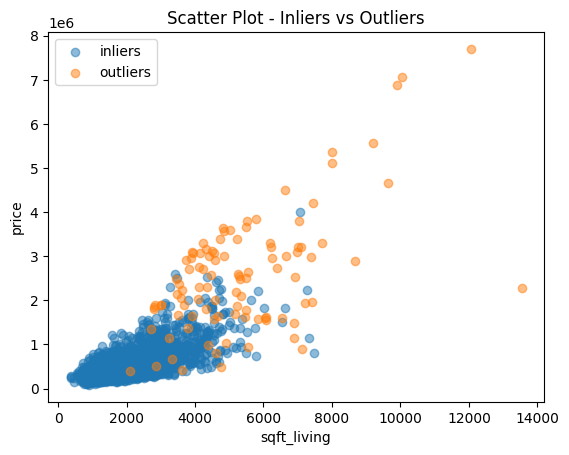

In [21]:
import matplotlib.pyplot as plt

# change the variable if you want to inspect this from other point of views
variable = "sqft_living"
target = "price"

# if you want to reduce the number of points visualized
# sample a small amount of points, for example 300-500
inliers_sample = inliers.sample(3000)
outliers_sample = outliers.sample(100)

plt.scatter(inliers_sample[variable], inliers_sample[target], label="inliers", alpha=0.5)
plt.scatter(outliers_sample[variable], outliers_sample[target], label="outliers", alpha=0.5)

plt.xlabel(variable)
plt.ylabel(target)

plt.title("Scatter Plot - Inliers vs Outliers")
plt.legend()
plt.show()

In [22]:
outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
300,3075000.0,4,5.00,4550,18641,1.0,1,4,3,10,2600,1950,2002,0,4550,19508
419,1550000.0,5,4.25,6070,171626,2.0,0,0,3,12,6070,0,1999,0,4680,211267
527,1600000.0,6,5.00,6050,230652,2.0,0,3,3,11,6050,0,2001,0,4210,233971
540,2125000.0,3,2.50,5403,24069,2.0,1,4,4,12,5403,0,1976,0,3980,104374
656,3070000.0,3,2.50,3930,55867,1.0,1,4,4,8,2330,1600,1957,0,2730,26324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20452,1600000.0,4,5.50,6530,871200,2.0,0,2,3,11,6530,0,2008,0,1280,858132
20767,2300000.0,4,4.00,4360,8175,2.5,1,4,3,10,3940,420,2007,0,2670,8525
21050,900000.0,5,6.00,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,3440,36859
21344,1488000.0,5,6.00,6880,279968,2.0,0,3,3,12,4070,2810,2007,0,4690,256803


### Another popular alternative: Elliptic Envelope

In [23]:
from sklearn.covariance import EllipticEnvelope

# contamination, same thing as in isolation
ee = EllipticEnvelope(contamination=0.005)
df = pd.read_csv("houses.csv")

# handle these better with your own dataset, here we are simply dropping these
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
y_pred = ee.fit_predict(df)
outliers = df[y_pred != 1]
inliers = df[y_pred == 1]


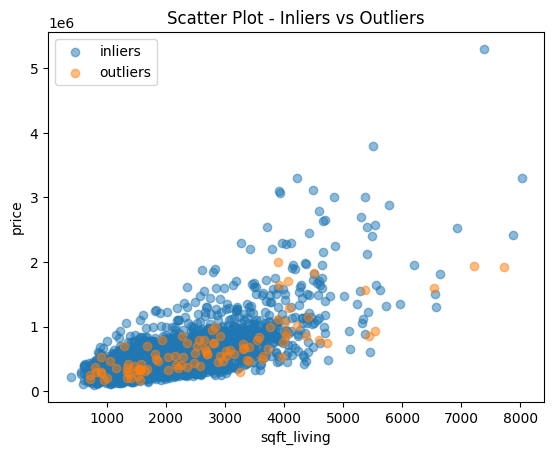

In [24]:
import matplotlib.pyplot as plt

variable = "sqft_living"
target = "price"

# if you want to reduce the number of points visualized
# sample a small amount of points, for example 300-500
inliers_sample = inliers.sample(3000)
outliers_sample = outliers.sample(100)

plt.scatter(inliers_sample[variable], inliers_sample[target], label="inliers", alpha=0.5)
plt.scatter(outliers_sample[variable], outliers_sample[target], label="outliers", alpha=0.5)

plt.xlabel(variable)
plt.ylabel(target)

plt.title("Scatter Plot - Inliers vs Outliers")
plt.legend()
plt.show()